<a href="https://www.kaggle.com/code/samilacak/france-fuel-prices-2023?scriptVersionId=163316366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

## Import Data 

In [2]:
df = pd.read_csv('/kaggle/input/france-fuel-prices/prix_carburants.csv', delimiter=';', header = 0)

## Basic Info About Data

In [3]:
df.head(3)

,id,cp,pop,adresse,ville,horaires,geom,prix_maj,prix_id,prix_valeur,...,epci_code,epci_name,dep_code,dep_name,reg_code,reg_name,com_code,com_name,services_service,horaires_automate_24_24
0,12270001,12270,R,ZA LE LAC,La Fouillade,NaN,"44.240241001506, 2.0328320468272003",2024-01-29T10:47:14+00:00,5.0,1.779,...,200069383.0,CC Ouest Aveyron Communauté,12,Aveyron,76.0,Occitanie,12105,La Fouillade,"Laverie,Station de gonflage,Piste poids lourds...",Non
1,25115001,25115,R,Z.A. les Salines,Pouilley-les-Vignes,"{""@automate-24-24"": ""1"", ""jour"": [{""@id"": ""1"",...","47.258, 5.927",2024-01-27T10:38:10+00:00,2.0,1.819,...,242500361.0,CU Grand Besançon Métropole,25,Doubs,27.0,Bourgogne-Franche-Comté,25467,Pouilley-les-Vignes,"Station de gonflage,Piste poids lourds,Lavage ...",Oui
2,80570001,80570,R,Rue Joliot Curie,Dargnies,"{""@automate-24-24"": """", ""jour"": [{""@id"": ""1"", ...","50.04475, 1.52562",2023-12-30T06:36:24+00:00,2.0,1.799,...,247600588.0,CC des Villes Sœurs,80,Somme,32.0,Hauts-de-France,80235,Dargnies,"Boutique alimentaire,Vente de gaz domestique (...",Non


In [4]:
df.shape

(33727, 23)

In [5]:
df.isna().sum()

id                            0
cp                            0
pop                           0
adresse                       0
ville                         0
horaires                   7630
geom                          0
prix_maj                    307
prix_id                     307
prix_valeur                 307
prix_nom                    307
com_arm_code                  8
com_arm_name                  8
epci_code                    10
epci_name                    10
dep_code                      8
dep_name                      8
reg_code                      8
reg_name                      8
com_code                      8
com_name                      8
services_service           2637
horaires_automate_24_24       0
dtype: int64

## Duplicated Values

In [6]:
df.duplicated().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33727 entries, 0 to 33726
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       33727 non-null  int64  
 1   cp                       33727 non-null  int64  
 2   pop                      33727 non-null  object 
 3   adresse                  33727 non-null  object 
 4   ville                    33727 non-null  object 
 5   horaires                 26097 non-null  object 
 6   geom                     33727 non-null  object 
 7   prix_maj                 33420 non-null  object 
 8   prix_id                  33420 non-null  float64
 9   prix_valeur              33420 non-null  float64
 10  prix_nom                 33420 non-null  object 
 11  com_arm_code             33719 non-null  object 
 12  com_arm_name             33719 non-null  object 
 13  epci_code                33717 non-null  float64
 14  epci_name             

## Drop Useless Columns 

- horaires, prix_maj, services_service are not very usefull in my analysis. 

In [8]:
df2 = df.drop(columns=['horaires', 'prix_maj', 'services_service'])

In [9]:
df2.shape

(33727, 20)

In [10]:
df2.isna().sum()

id                           0
cp                           0
pop                          0
adresse                      0
ville                        0
geom                         0
prix_id                    307
prix_valeur                307
prix_nom                   307
com_arm_code                 8
com_arm_name                 8
epci_code                   10
epci_name                   10
dep_code                     8
dep_name                     8
reg_code                     8
reg_name                     8
com_code                     8
com_name                     8
horaires_automate_24_24      0
dtype: int64

## Handling Missing Values

In [11]:
df2.columns

Index(['id', 'cp', 'pop', 'adresse', 'ville', 'geom', 'prix_id', 'prix_valeur',
       'prix_nom', 'com_arm_code', 'com_arm_name', 'epci_code', 'epci_name',
       'dep_code', 'dep_name', 'reg_code', 'reg_name', 'com_code', 'com_name',
       'horaires_automate_24_24'],
      dtype='object')

### 'prix_id', 'prix_valeur', 'prix_nom'

- I observed that there were Null values in the same row in 3 columns in my data: 'prix_id', 'prix_valeur', 'prix_nom'.

In [12]:
# Let's find the number of rows containing Null values in these 3 columns at the same time.
num_null_rows = df2[df2['prix_id'].isnull() & df2['prix_valeur'].isnull() & df2['prix_nom'].isnull()].shape[0]
num_null_rows

307

In [13]:
# Drop theese rows 
df3 = df2.copy()
df3.dropna(subset=['prix_id', 'prix_valeur', 'prix_nom'], inplace=True)

### The Other Columns which include Null values
- Since I had very few rows containing null values, I decided to delete them all.

In [14]:
df3.dropna(inplace=True)

In [15]:
df3.isna().sum().any()

False

## Feature Engineering 

- Making a new columns 'longitute' and 'latitude' from 'Geom' column. 

In [16]:
df4 = df3.copy()

In [17]:
df4.geom.dtype

dtype('O')

In [18]:
df4['geom'].sample(5)

30270                            47.537, 4.461
18516                            49.188, 6.698
12207                            43.592, 3.867
18142    45.537171833189994, 5.576915738276501
2316              44.7295482446, 5.01713715307
Name: geom, dtype: object

In [19]:
# Making a new columns : 
df4['latitude'] = df4['geom'].str.split(',').str[0]
df4['longitude'] = df4['geom'].str.split(',').str[1]

# Check the dtype of new columns : 
df4['latitude'].dtype
df4['longitude'].dtype


dtype('O')

In [20]:
# Change new columns to numeric. It then converts the erroneous values to NaN by setting the 'errors' parameter to 'coerce'
df4['latitude'] = pd.to_numeric(df4['latitude'], errors='coerce')
df4['longitude'] = pd.to_numeric(df4['longitude'], errors='coerce')

# Check the dtype : 
df4['latitude'].dtype
df4['longitude'].dtype

dtype('float64')

## Data Analysis 

### Compare Fuel Types 

In [21]:
df4['prix_nom'].unique()

array(['E10', 'SP95', 'E85', 'SP98', 'Gazole', 'GPLc'], dtype=object)

In [22]:
# Finding the number of stations for each fuel type
station_counts = df4['prix_nom'].value_counts()

print("Fuel Types and Number of Stations: \n")
print(station_counts)

Fuel Types and Number of Stations: 

prix_nom
Gazole    9624
SP98      8025
E10       7320
E85       3543
SP95      3540
GPLc      1358
Name: count, dtype: int64


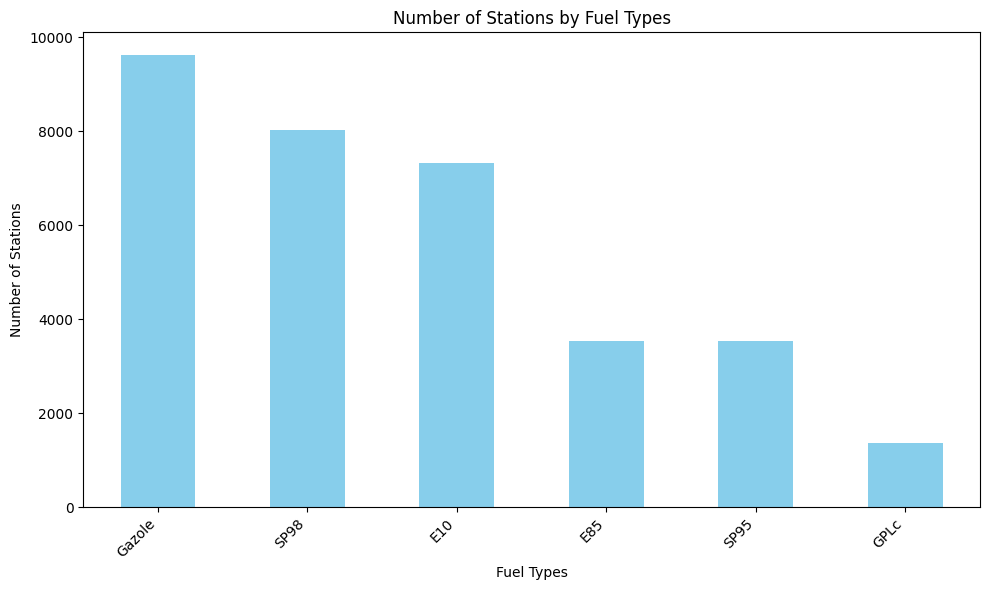

Analysis: There are more Gasole stations in France than any other fuel type.


In [23]:
plt.figure(figsize=(10, 6))
station_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Stations by Fuel Types')
plt.xlabel('Fuel Types')
plt.ylabel('Number of Stations')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Analysis: There are more Gasole stations in France than any other fuel type.")

### Prix Valeur Column (Fuel Prices)

#### Gazole 

- Analysis: As we can see in the chart below, we have some outliers in the Gazole price.
- Lower bound is 1.62 and Upper bound is 1.98. 

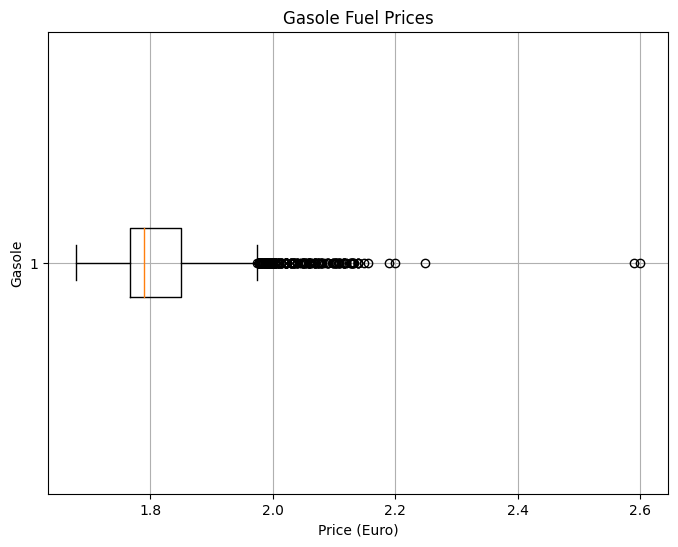

In [24]:
import matplotlib.pyplot as plt

gazole_data = df4[df4['prix_nom'] == 'Gazole']

plt.figure(figsize=(8, 6))
plt.boxplot(gazole_data['prix_valeur'], vert=False)
plt.title('Gasole Fuel Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Gasole')
plt.grid(True)
plt.show()


In [25]:
gazole_data['prix_valeur'].describe()

count    9624.000000
mean        1.814208
std         0.069058
min         1.679000
25%         1.767000
50%         1.789000
75%         1.850000
max         2.600000
Name: prix_valeur, dtype: float64

In [26]:
Q1 = gazole_data['prix_valeur'].quantile(0.25)
Q3 = gazole_data['prix_valeur'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower bound:", lower_bound)
print("upper bound:", upper_bound)

lower bound: 1.6424999999999996
upper bound: 1.9745000000000004


In [27]:
import folium
from IPython.display import display

# Select rows with outliers belonging to Gazole
outliers = gazole_data[(gazole_data['prix_valeur'] < lower_bound) | (gazole_data['prix_valeur'] > upper_bound)]

# Create map
mymap = folium.Map(location=[48.8566, 2.3522], zoom_start=6)

# Add locations of outliers to the map
for index, row in outliers.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Gazole Fiyatı: {row['prix_valeur']} Euro").add_to(mymap)

# view map
display(mymap)


/tmp/ipykernel_18/3485447049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gazole['z_score'] = (df_gazole['prix_valeur'] - mean_gasole) / standard_deviation


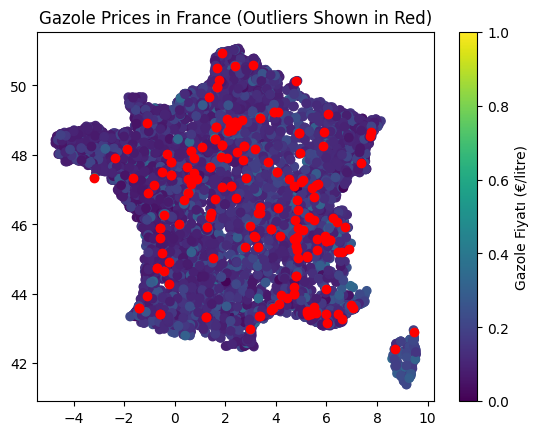

In [28]:
# Filter 'Gazole' prices
df_gazole = df4[df4['prix_nom'] == 'Gazole']

# Calculate mean and standard deviation
mean_gasole = df_gazole['prix_valeur'].mean()
standard_deviation = df_gazole['prix_valeur'].std()

# Calculate z-scores
df_gazole['z_score'] = (df_gazole['prix_valeur'] - mean_gasole) / standard_deviation

# Select threshold value to identify outliers
threshold_value = 2.6

# Mark Outliers in red
plt.scatter(df_gazole['longitude'], df_gazole['latitude'], c=df_gazole['prix_valeur'], cmap='viridis')
plt.scatter(df_gazole[df_gazole['z_score'] > threshold_value]['longitude'], df_gazole[df_gazole['z_score'] > threshold_value]['latitude'], c='red')

# Add color swatch
plt.colorbar(label='Gazole Fiyatı (€/litre)')

plt.title("Gazole Prices in France (Outliers Shown in Red)")

plt.show()


##### E10

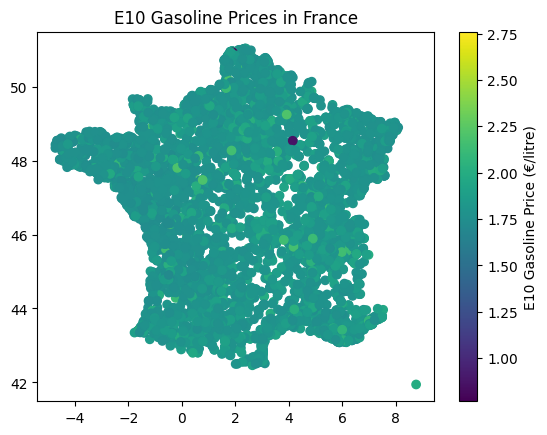

In [29]:
# Perform filtering to select data for E10 gasoline prices
df_e10 = df4[df4['prix_nom'] == 'E10']

# Use only E10 data for the map
plt.scatter(df_e10['longitude'], df_e10['latitude'], c=df_e10['prix_valeur'], cmap='viridis')
# Update title to reflect E10 gasoline prices
plt.title("E10 Gasoline Prices in France")
# Choose a color scale suitable for the E10 price range
plt.colorbar(label='E10 Gasoline Price (€/litre)')


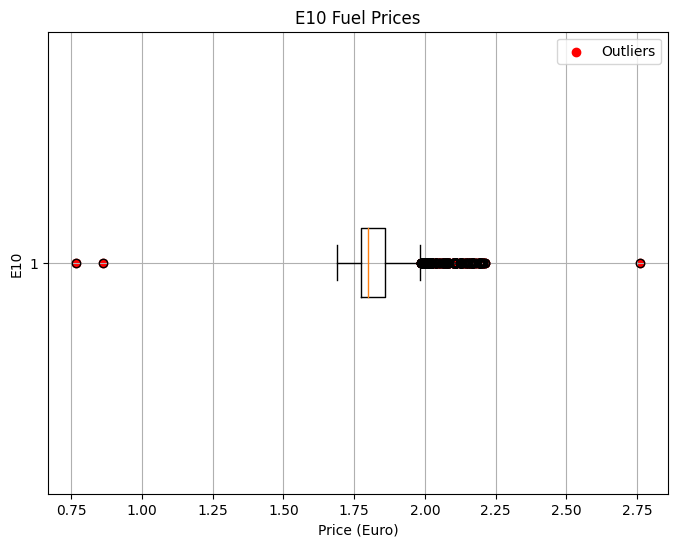

Lower bound of E10: 1.648
Upper bound of E10: 1.9840000000000002


In [30]:
df_e10 = df4[df4['prix_nom'] == 'E10']

# Find outliers in E10 data
Q1_e10 = df_e10['prix_valeur'].quantile(0.25)
Q3_e10 = df_e10['prix_valeur'].quantile(0.75)
IQR_e10 = Q3_e10 - Q1_e10

lower_bound_e10 = Q1_e10 - 1.5 * IQR_e10
upper_bound_e10 = Q3_e10 + 1.5 * IQR_e10

# Create a DataFrame containing outliers for E10 data
outliers_e10 = df_e10[(df_e10['prix_valeur'] < lower_bound_e10) | (df_e10['prix_valeur'] > upper_bound_e10)]

# Create a cat whisker plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_e10['prix_valeur'], vert=False)
plt.title('E10 Fuel Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('E10')
plt.grid(True)

# Mark on the whisker chart to show outliers
plt.scatter(outliers_e10['prix_valeur'], [1] * len(outliers_e10), color='red', label='Outliers')
plt.legend()

plt.show()

print("Lower bound of E10:", lower_bound_e10)
print("Upper bound of E10:", upper_bound_e10)

In [31]:
# df4[['latitude', 'longitude']] = df3['geom'].str.split(',', expand=True)

### Region Fuel Prices

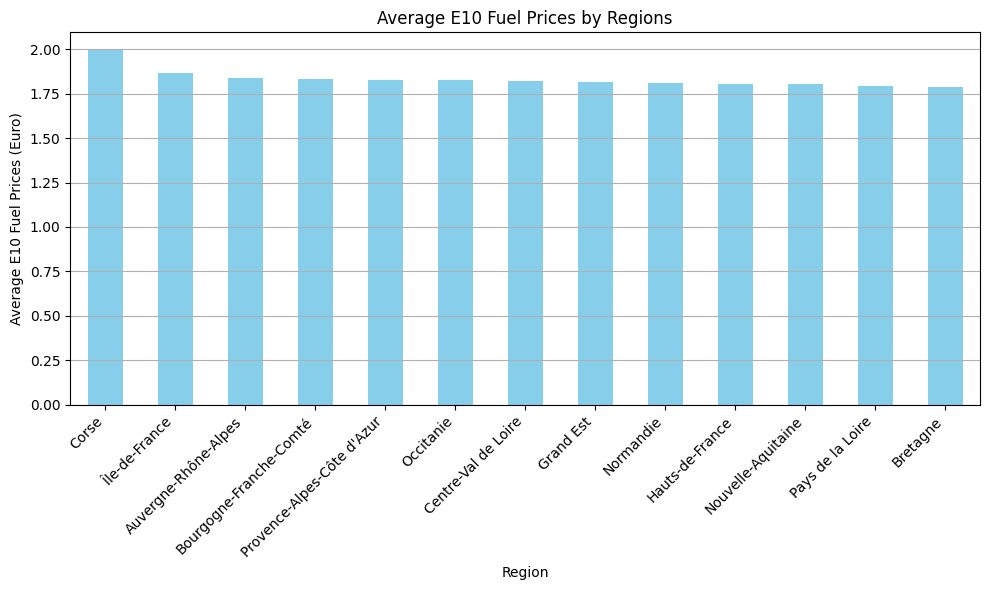

In [32]:
# Filter DataFrame containing E10 fuel data
df_e10 = df4[df4['prix_nom'] == 'E10']

# Calculate the average price of 'E10' fuel in each region
region_e10_prices = df_e10.groupby('reg_name')['prix_valeur'].mean().sort_values(ascending=False)

# Making bar chart
plt.figure(figsize=(10, 6))
region_e10_prices.plot(kind='bar', color='skyblue')
plt.title('Average E10 Fuel Prices by Regions')
plt.xlabel('Region')
plt.ylabel('Average E10 Fuel Prices (Euro)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


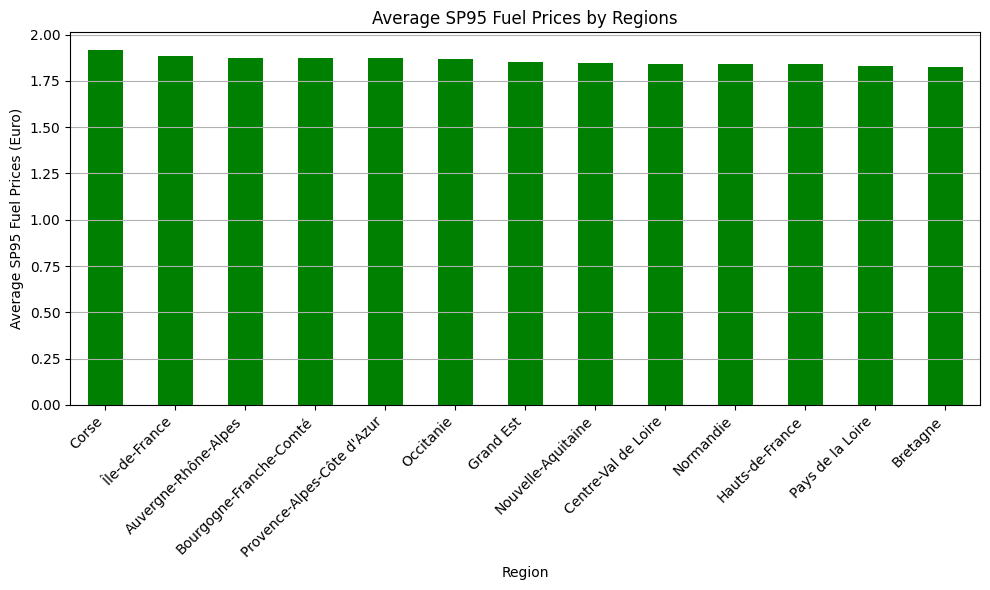

In [33]:
# Filter DataFrame containing SP95 fuel data
df_SP95 = df4[df4['prix_nom'] == 'SP95']

# Calculate the average price of 'SP95' fuel in each region
region_SP95_prices = df_SP95.groupby('reg_name')['prix_valeur'].mean().sort_values(ascending=False)

# Making bar chart
plt.figure(figsize=(10, 6))
region_SP95_prices.plot(kind='bar', color='green')
plt.title('Average SP95 Fuel Prices by Regions')
plt.xlabel('Region')
plt.ylabel('Average SP95 Fuel Prices (Euro)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### City fuel prices

In [34]:
# Filter DataFrame containing 'Gazole' fuel data
df_gazole = df4[df4['prix_nom'] == 'Gazole']

# Create a DataFrame containing city names, prices and addresses
gazole_prices_by_city = df_gazole[['ville', 'adresse', 'prix_valeur']]

# Sort DataFrame by prices
gazole_top_10_cities = gazole_prices_by_city.sort_values(by='prix_valeur', ascending=False).head(10)

print("Top 10 Cities with the Most Expensive Gazole Prices:\n ")
print(gazole_top_10_cities)


Top 10 Cities with the Most Expensive Gazole Prices:
 
                 ville                           adresse  prix_valeur
15984            PARIS             253 Boulevard Raspail        2.600
31648            Paris                  69 Avenue Kléber        2.590
14245          GALERIA              Lieu dit Fango - D81        2.249
10946            PARIS                15 Avenue Duquesne        2.200
21312            PARIS           8,10,10bis Rue Bailleul        2.190
26975       BONNEVILLE  Aire de Pontchy Bonneville - A40        2.155
6175             PARIS                  PLACE TATTEGRAIN        2.149
27766  Longué-Jumelles    AUT A 85  AIRE LES COSSONIERES        2.140
18891  Vétraz-Monthoux           132 Route de Bonneville        2.140
16914  Longué-Jumelles     AUT A 85  AIRE DE LA COUAILLE        2.140


## Create A New Csv File to Use on Tableau 

In [35]:
df5 = df4.drop('geom', axis = 1)

In [36]:
df5.to_csv('prix_carburants_cleaned.csv', index=False)